In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
age_data = pd.read_csv('/Users/blakemyers/Desktop/age_gender.csv')
age_data.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [3]:
def label_age (row):
    if row['age'] > 0 and row['age'] < 6:
        return 0
    elif row['age'] > 5 and row['age'] < 13:
        return 1
    elif row['age'] > 12 and row['age'] < 21:
        return 2
    elif row['age'] > 20 and row['age'] < 36:
        return 3
    elif row['age'] > 35 and row['age'] < 51:
        return 4
    elif row['age'] > 50 and row['age'] < 71:
        return 5
    else:
        return 6

In [4]:
age_data['AgeGroup'] = age_data.apply (lambda row: label_age(row), axis=1)

In [5]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels,AgeGroup
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0


In [6]:
X = []
y = []
for index, row in age_data.iterrows():
    k = row['pixels'].split(" ")
    X.append(np.array(k))
    y.append(row['AgeGroup'])
        
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8/0.9, random_state=42)

In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train = np_utils.to_categorical(y_train, num_classes = 7)
y_valid = np_utils.to_categorical(y_valid, num_classes = 7)
y_test = np_utils.to_categorical(y_test, num_classes = 7)

In [8]:
X_train.shape

(18963, 48, 48, 1)

In [9]:
X_valid.shape

(2371, 48, 48, 1)

In [10]:
X_test.shape

(2371, 48, 48, 1)

In [11]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [12]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,batch_size=64,epochs=30,verbose=1,validation_data=(X_valid, y_valid))

Train on 18963 samples, validate on 2371 samples
Epoch 1/30
18963/18963 [==============================] - 1181s 62ms/step - loss: 1.6484 - accuracy: 0.4281 - val_loss: 1.5826 - val_accuracy: 0.4466
Epoch 2/30
18963/18963 [==============================] - 1104s 58ms/step - loss: 1.5072 - accuracy: 0.4663 - val_loss: 1.3498 - val_accuracy: 0.5086
Epoch 3/30
18963/18963 [==============================] - 1091s 58ms/step - loss: 1.3050 - accuracy: 0.5272 - val_loss: 1.5253 - val_accuracy: 0.4631
Epoch 4/30
18963/18963 [==============================] - 1093s 58ms/step - loss: 1.1801 - accuracy: 0.5593 - val_loss: 1.1396 - val_accuracy: 0.5652
Epoch 5/30
18963/18963 [==============================] - 1144s 60ms/step - loss: 1.0907 - accuracy: 0.5872 - val_loss: 1.2042 - val_accuracy: 0.5673
Epoch 6/30
18963/18963 [==============================] - 1132s 60ms/step - loss: 1.0310 - accuracy: 0.6046 - val_loss: 1.2098 - val_accuracy: 0.5694
Epoch 7/30
18963/18963 [===========================

In [14]:
local_path = '/Users/blakemyers/Desktop/Jupyter/DeepLearning2021/TrainedModelTrValTst1'
model.save(local_path)

In [23]:
Y_test = np.argmax(y_test, axis=1)
y_pred = model.predict_classes(X_test)
target_names = ['1-5','6-12','13-20','21-35', '36-50', '51-70','71-116']

print(classification_report(Y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

         1-5       0.89      0.92      0.90       215
        6-12       0.61      0.49      0.54       105
       13-20       0.33      0.26      0.29       141
       21-35       0.73      0.78      0.75      1003
       36-50       0.40      0.31      0.35       408
       51-70       0.51      0.54      0.52       369
      71-116       0.53      0.68      0.60       130

    accuracy                           0.63      2371
   macro avg       0.57      0.57      0.57      2371
weighted avg       0.61      0.63      0.62      2371



In [24]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
print(cm)

[[198  10   0   5   0   1   1]
 [ 24  51  16   8   0   3   3]
 [  0  16  37  76   5   5   2]
 [  0   5  50 783 122  37   6]
 [  1   2   4 147 127 120   7]
 [  0   0   5  47  58 201  58]
 [  0   0   1   7   3  31  88]]


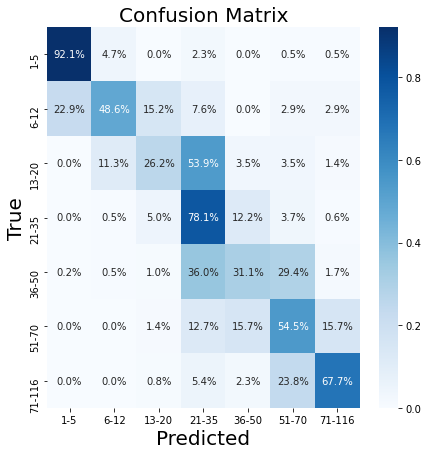

In [51]:
fig,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(['1-5','6-12','13-20','21-35', '36-50', '51-70','71-116'], size=10); \
ax.yaxis.set_ticklabels(['1-5','6-12','13-20','21-35', '36-50', '51-70','71-116'], size=10);